# A model of sequence-dependent mutations

Assume that the probability $p_{x,b}$ that a given sample genome mutates to the base $b$ at site $x$ depends only upon local 
(reference) sequence context. That is, assume 

\begin{equation*}
p_{x,b} = p_{f(x, k), \, b}, 
\end{equation*}
where $f(x, k)$ is the reference subsequence of size $k$ centered at site $x$. 

Assume further the **independent sites approximation**:
mutations are so rare in an individual sample that we may safely 
neglect the event where two or more mutations occur in k-mers that overlap each other.

## Special cases

### Cancer

Under the model described above, 
in a cohort of $m$ genomes, the number at which the site $x$ is occupied by the base $b$, represented by $n_{x,b}$, is distributed according to:

\begin{equation*} 
\mathrm{Multinomial}(n_{x, A}, \, n_{x,C}, \, n_{x,G}, \, n_{x,T} \, | \, m, \, p_{f(x,k),\, A}, \, p_{f(x,k),\, C}, \, p_{f(x,k),\, G}, \, p_{f(x,k),\, T}) .
\end{equation*} 



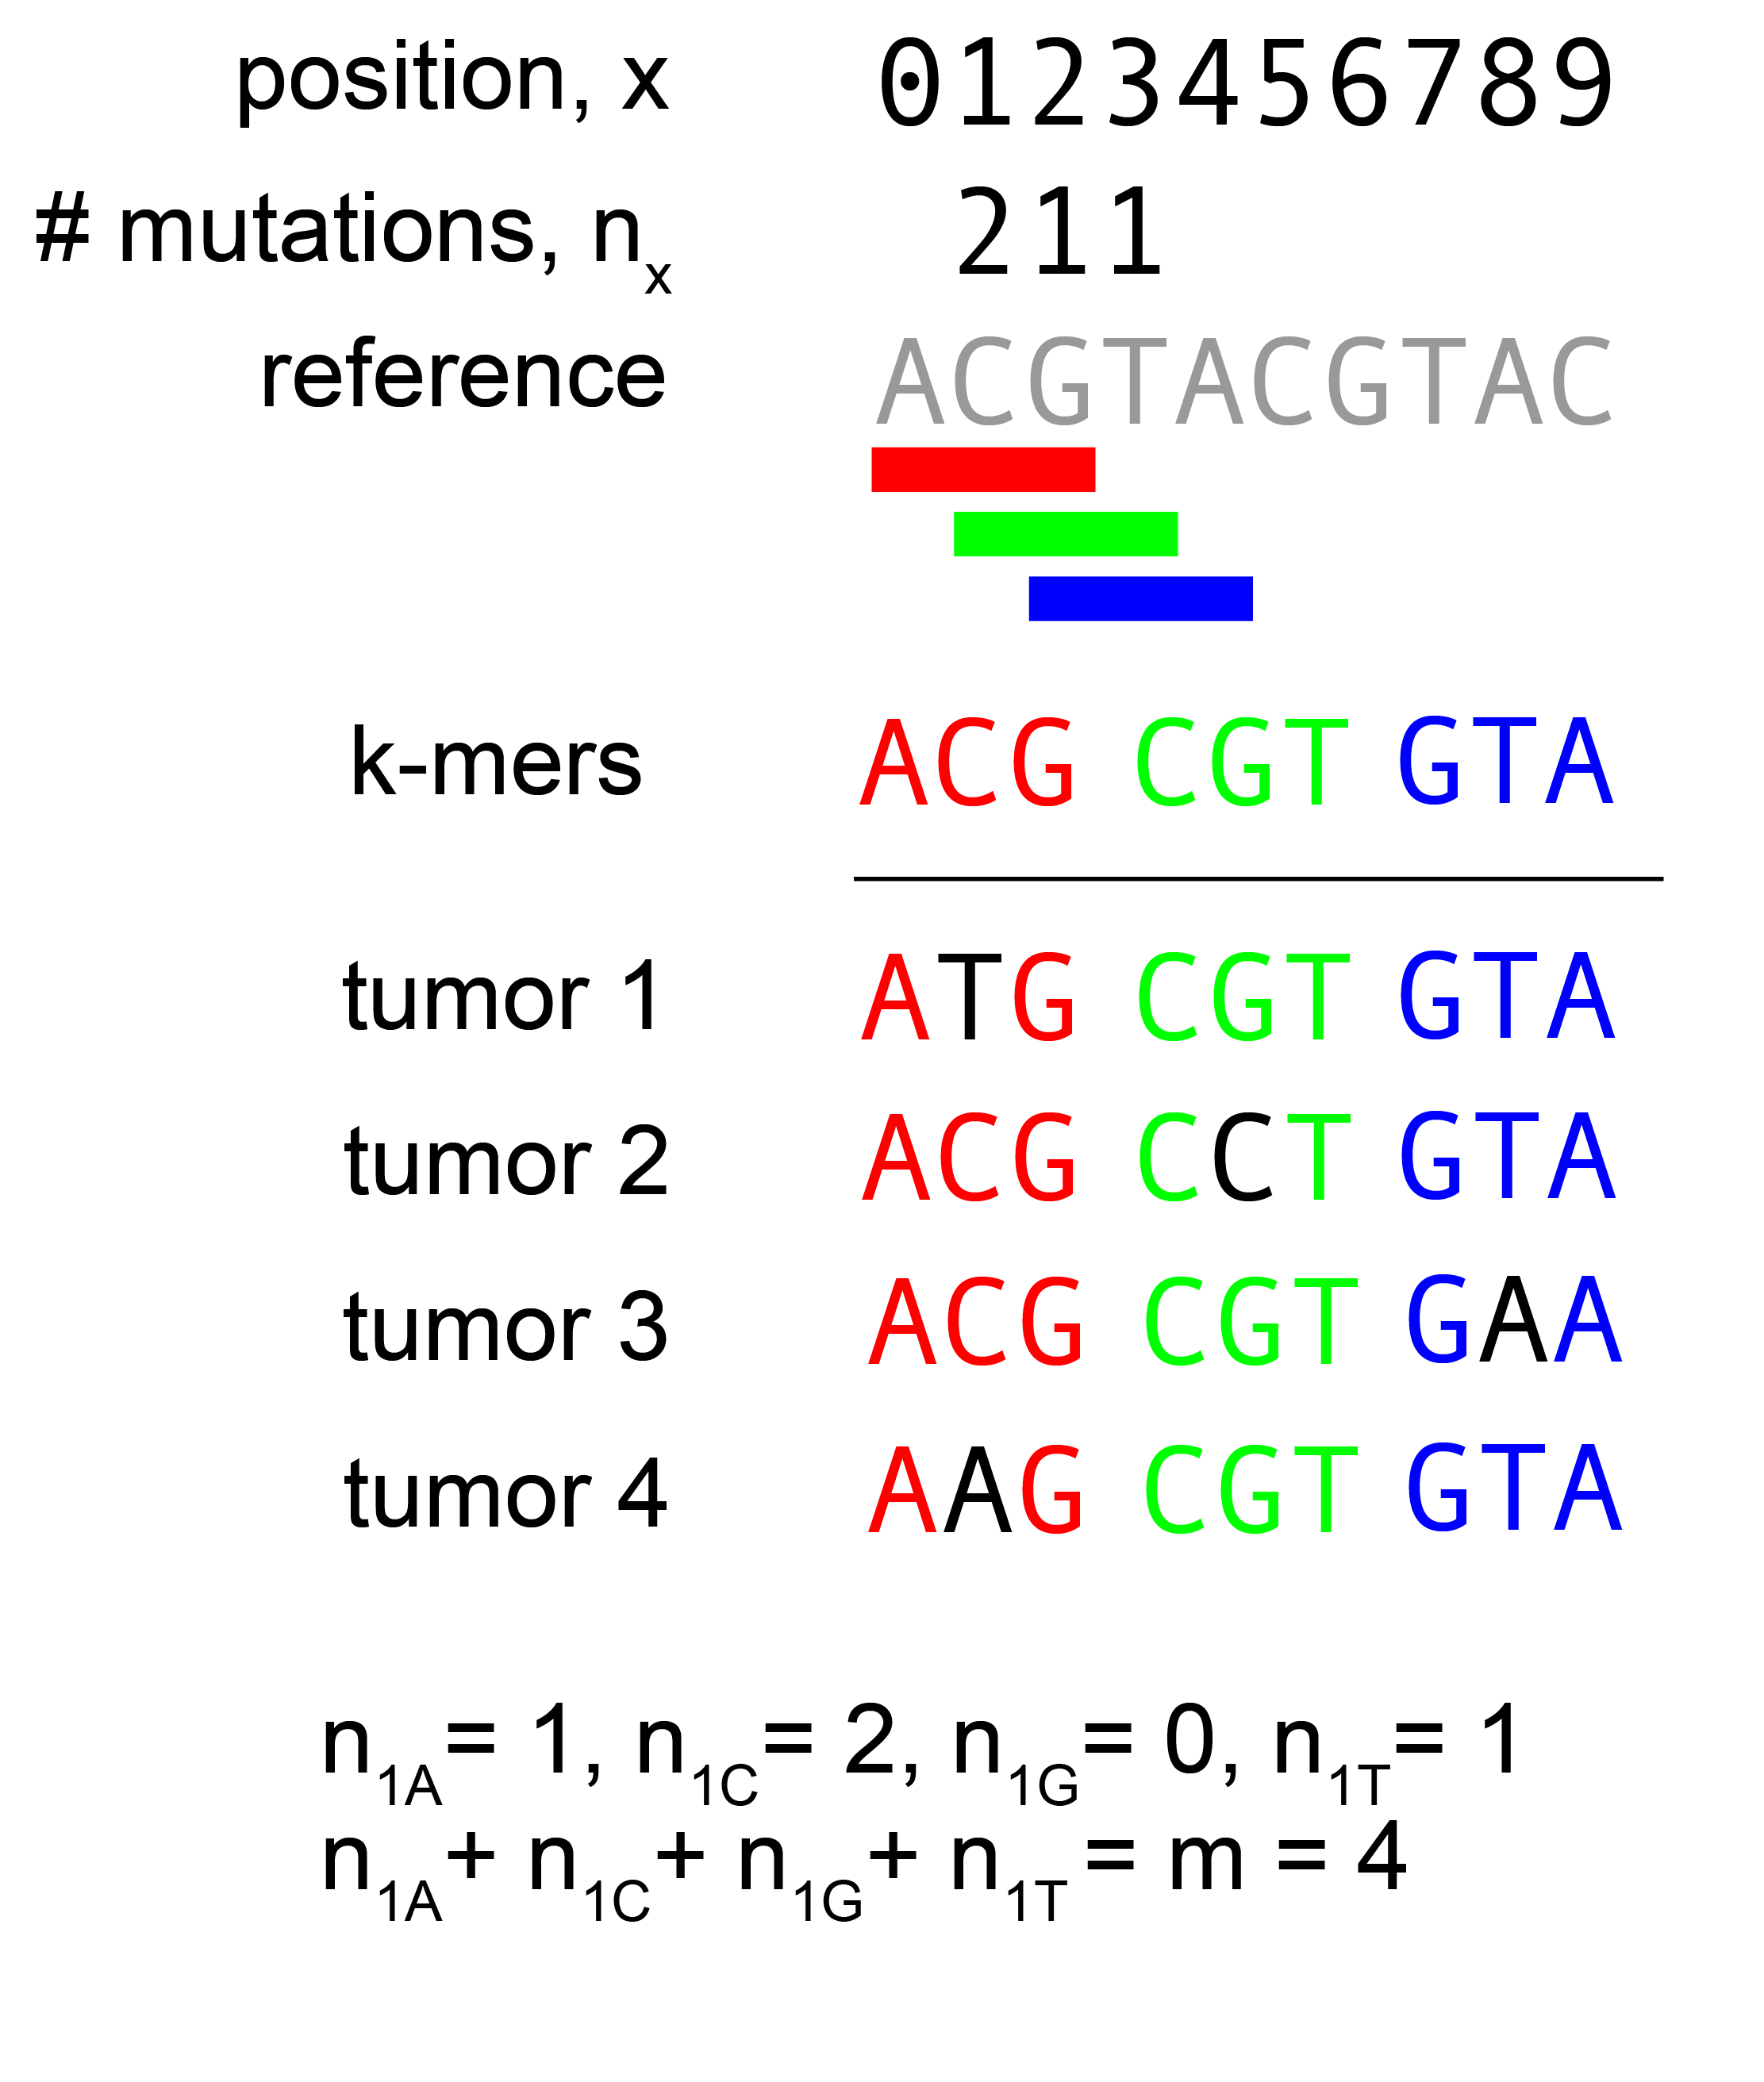

In [1]:
# embed raw image data in notebook: 
# https://github.com/microsoft/vscode-jupyter/issues/6437
from IPython.display import Image
Image(filename='model.400ppi.png', width=400)

Similarly, in a genomic interval containing $l_{s}$ reference occurrences of the k-mer $s$, 
the number of occurrences in the cohort, $n_{s, b}$, where the center nucleotide of $s$ is $b$ 
is distributed as: 

\begin{equation*} 
\mathrm{Multinomial}(n_{s, A}, \, n_{s,C}, \, n_{s,G}, \, n_{s,T} \, | \, ml_s, p_{s,\, A}, \, p_{s,\, C}, \, p_{s,\, G}, \, p_{s,\, T}) .
\end{equation*} 

The mutation probability, $p_x$, at site $x$ is given by: 
\begin{equation*} 
p_x = \sum_{b \neq g(f(x,k))} p_{f(x,k),\, b},
\end{equation*}
where $g(s)$ is the center nucleotide of the k-mer $s$.

The number of mutations $N_x$ observed at site $x$ over all $m$ genomes is distributed as:

\begin{equation*} 
P[N_x = n_x] = \mathrm{Binomial}(n_x \, | \, m, \, p_x) .
\end{equation*} 

and the expected number of mutations at site $x$ is: 

\begin{equation*} 
\langle N_x \rangle = m p_x.
\end{equation*} 

At those sites $x$ where a mutation has been observed in at least one genome, 
the expected number of mutations is: 

\begin{equation*} 
\langle N_x | N_x > 0 \rangle = \frac{\langle N_x \rangle}{1 - P[N_x = 0]}
\end{equation*} 

Similarly, 
the number of mutations $N_s$ of k-mer $s$ in a genomic interval containing $l_s$ 
occurrences of k-mer $s$, is distributed as:

\begin{equation*} 
P[N_s = n_s] = \mathrm{Binomial}(n_s \, | \, ml_s, p_s) ,
\end{equation*}

where again $m$ is the number of genomes, and 
the probability that k-mer $s$ mutates is 

\begin{equation*} 
p_s = \sum_{b \neq g(s)} p_{s,\, b}.
\end{equation*}



### Germline

We formulate the model slighly differently in the case of germline genetics. 
That's because identical derived alleles at a given site in two human samples are very likely to be inherited from a common ancestor. 
(In contrast, identical alleles in two tumor samples are guaranteed to have arisen independently, assuming they are not related via metastasis.) 
Therefore the number of times a given allele recurs across a human cohort reflects natural selection acting on the allele
(in addition to the mutability of the site). 


Interpret $p_{s,b}$ as the probability that a SNP exists in the extant population at the center of a kmer $s$, with a derived allele $b$. 
Such probabilities have been estimated many times before, e.g., Halldorsson et al 2021; Li et al 2021; Feng, Deng, Li 2021; Iulio et al 2018, Aggarwala and Voight 2016; Samocha et al 2014.


In a genomic interval containing $l_{s}$ reference occurrences of the k-mer $s$, 
the number of SNPs, $n_{s, b}$, where the center nucleotide of $s$ in the reference has been changed to $b$ in a sample 
is distributed as: 

\begin{equation*} 
\mathrm{Multinomial}(n_{s, A}, \, n_{s,C}, \, n_{s,G}, \, n_{s,T} \, | \, l_s, p_{s,\, A}, \, p_{s,\, C}, \, p_{s,\, G}, \, p_{s,\, T}) .
\end{equation*} 

The number of SNPs of k-mer $s$, $N_s$, in a genomic interval containing $l_s$ 
occurrences of k-mer $s$, is distributed as:

\begin{equation*} 
P[N_s = n_s] = \mathrm{Binomial}(n_s \, | \, l_s, p_s) ,
\end{equation*}

where 
the probability that k-mer $s$ mutates is 

\begin{equation*} 
p_s = \sum_{b \neq g(s)} p_{s,\, b},
\end{equation*}

and $g(s)$ is the center nucleotide of the k-mer $s$. 



## Simulating the distribution of the total number of mutations/SNPs in a genomic interval

In the special case that mutation probabilities are independent of sequence context, $p_s = p$, 
the total number of mutations/SNPs in a genomic interval containing $r$ distinct k-mers
is 

\begin{align*} 
N = N_{s_1} + \cdots + N_{s_r} & \sim & \mathrm{Binomial}(ml_{s_1} + \cdots + ml_{s_r}, p) \\
& = & \mathrm{Binomial}(ml, p) \\
& \rightarrow & \mathrm{Poisson}(mlp)
\end{align*}

where $m$ is the number of tumor samples in the cancer case and $m=1$ in the germline case, $l$ is the length of the genomic interval, 
and the limit is taken such that $l\rightarrow\infty$, $p\rightarrow 0$ and $mlp$ is kept constant. 

This special case is not met in practice, though. Instead, the mutation probabilities vary with local sequence context. In that case, the distribution of the number of mutations/SNPs in a genomic interval, $P[ N = n ]$, has no analytic form and must be estimated, as pointed out by others: https://stackoverflow.com/questions/69134950/how-to-add-random-variables-in-tensorflow-probability

One way to do that is:


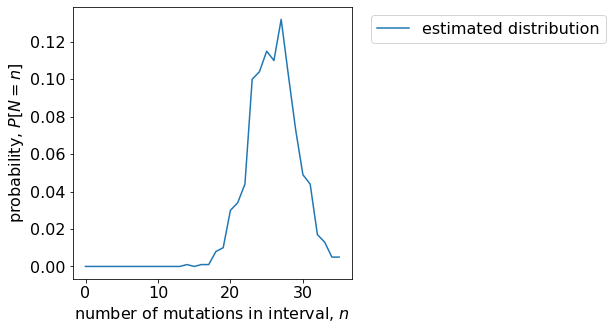

In [2]:
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
import numpy as np
tf.enable_v2_behavior()
tfd = tfp.distributions 

from collections import Counter
from matplotlib import pyplot as plt 
%matplotlib inline 

def estimate_probability_of_number_of_mutations_in_interval(
    number_kmers,
    kmer_mutation_probabilities,
    number_examples = 1000 # number of samples to draw from each binomial distribution 
): 
    number_of_mutations_of_kmers = tfd.Binomial(
        total_count = number_kmers, 
        probs = kmer_mutation_probabilities
    ).sample(number_examples)
    
    number_of_mutations_in_interval = tf.reduce_sum(number_of_mutations_of_kmers, axis=1).numpy()
 
    counts_of_number_of_mutations_in_interval = Counter(number_of_mutations_in_interval)    
    max_number_of_mutations_in_interval = int(np.max(number_of_mutations_in_interval))
    probability_of_number_of_mutations_in_interval = np.array([
        counts_of_number_of_mutations_in_interval[value] 
        if value in counts_of_number_of_mutations_in_interval 
        else 0 
        for value in range(max_number_of_mutations_in_interval)
    ])/number_examples
    
    return max_number_of_mutations_in_interval, probability_of_number_of_mutations_in_interval
    
def analytic_distribution_of_number_of_mutations_in_interval(
    number_kmers, 
    kmer_mutation_probabilities
): 
    return tfd.Binomial(
        total_count = np.sum(number_kmers).astype('float32'), 
        probs = kmer_mutation_probabilities
    )
    
def plot_distribution_of_number_mutations_in_interval(number_kmers, kmer_mutation_probabilities):     
    max_number_of_mutations_in_interval, probability_of_number_of_mutations_in_interval = \
        estimate_probability_of_number_of_mutations_in_interval(number_kmers, kmer_mutation_probabilities)
    
    plt.figure(figsize=(5,5))
    plt.rcParams.update({'font.size': 16})    
    plt.plot(probability_of_number_of_mutations_in_interval, label='estimated distribution')
    plt.xlabel('number of mutations in interval, $n$')
    plt.ylabel('probability, $P[N=n]$')

    if type(kmer_mutation_probabilities) == float:
        dist = analytic_distribution_of_number_of_mutations_in_interval(number_kmers, kmer_mutation_probabilities)
        plt.plot(dist.prob(range(max_number_of_mutations_in_interval)), label='analytic distribution')  
        
    plt.legend(loc='upper left', bbox_to_anchor=(1.04,1), fontsize=16) 
       
# suppose there are 3 distinct kmers in the genomic interval,
# each occurring the following number of times (aggregated over the sequence, and all samples in the tumor case) 
counts_of_three_distinct_kmers = [10, 20, 30]

plot_distribution_of_number_mutations_in_interval(
    number_kmers = counts_of_three_distinct_kmers,
    kmer_mutation_probabilities = [.4, .8, .2]
)

As a sanity check, the estimated distribution collapses onto the analytic solution in the special case of equal mutation probabilities: 

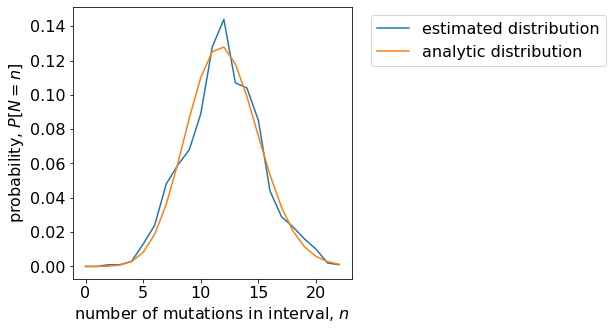

In [3]:
plot_distribution_of_number_mutations_in_interval(
    number_kmers = counts_of_three_distinct_kmers,
    kmer_mutation_probabilities = .2 # common value of all mutation probabilities
)

## A hypothesis test based upon mutation/SNP counts in a genomic interval

With the distribution $P[ N = n ]$ in hand, it is trivial to estimate the **p-value** , $P[ N \leq n ]$, corresponding to the observed number of mutations/SNPs in a genomic interval, $n$, under this model: 

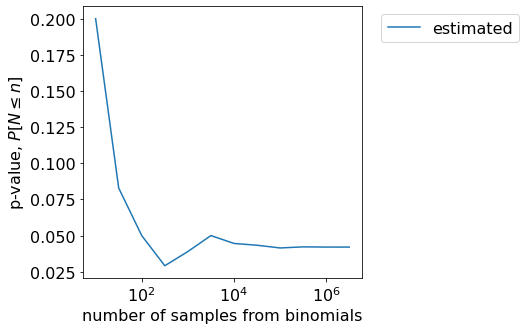

In [4]:
def compute_p_value(
    number_kmers, 
    kmer_mutation_probabilities, 
    observed_number_of_mutations_in_interval,
    number_examples
):     
    max_number_of_mutations_in_interval, probability_of_number_of_mutations_in_interval = \
        estimate_probability_of_number_of_mutations_in_interval(
        number_kmers, 
        kmer_mutation_probabilities,
        number_examples 
    )
    
    if observed_number_of_mutations_in_interval > max_number_of_mutations_in_interval: 
        return 1.0
    else: 
        # prob(N > n) (to be consistent with TensorFlow Probability API):
        right_tail = np.sum(probability_of_number_of_mutations_in_interval[
            observed_number_of_mutations_in_interval+1:]) 
        left_tail = 1.0 - right_tail
        return left_tail
    

def plot_p_value_convergence(
    number_kmers, 
    kmer_mutation_probabilities, 
    observed_number_of_mutations_in_interval
):     
    number_examples, p_values = zip(*[
        (10**exponent, 
         compute_p_value(
             number_kmers,
             kmer_mutation_probabilities,
             observed_number_of_mutations_in_interval,
             number_examples = 10**exponent
         )) for exponent in np.arange(1, 7, 0.5)
    ])
    
    plt.figure(figsize=(5,5))
    plt.rcParams.update({'font.size': 16})    
    plt.plot(number_examples, p_values, label='estimated')
    plt.xlabel('number of samples from binomials')
    plt.ylabel('p-value, $P[N \leq n]$')
    plt.xscale('log')
    
    if type(kmer_mutation_probabilities) == float:
        dist = analytic_distribution_of_number_of_mutations_in_interval(number_kmers, kmer_mutation_probabilities)        
        right_tail = 1 - dist.cdf(observed_number_of_mutations_in_interval) # prob(N > n)
        true_pvalue = 1.0 - right_tail
        plt.plot([min(number_examples), max(number_examples)], [true_pvalue, true_pvalue], label='true')  
    
    plt.legend(loc='upper left', bbox_to_anchor=(1.04,1), fontsize=16) 

plot_p_value_convergence(
    number_kmers = counts_of_three_distinct_kmers,
    kmer_mutation_probabilities = [.4, .8, .2],
    observed_number_of_mutations_in_interval = 20
)    

Again, as a sanity check, the estimated p-value collapses onto the analytic solution in the special case of equal mutation probabilities: 

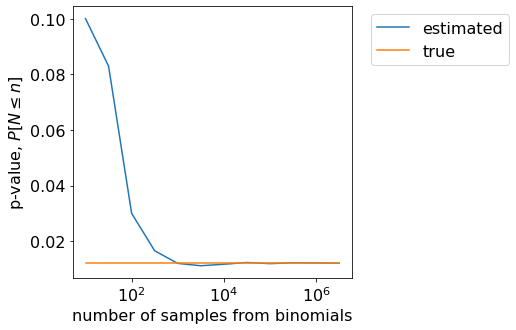

In [5]:
plot_p_value_convergence(
    number_kmers = counts_of_three_distinct_kmers,
    kmer_mutation_probabilities = .2, # common value of all mutation probabilities
    observed_number_of_mutations_in_interval = 5
)    

# A hypothesis test based upon allele frequencies 

In the germline case, we have other information in addition to the number of SNPs: their allele frequencies. As the sizes of population databases increase rapidly, these allele frequencies are expected to become more informative. 

We expect that leveraging both SNP counts AND frequencies will increase our ability to reliably discover natural selection. For example, when the number of SNPs per 100bp, say, is smaller than the number expected given the sequence that appears in those 100bp, one would suspect that purifing selection has been acting. Further, if the frequencies of the derived alleles at those sites are, on average, smaller than an expectation derived from putatively neutral regions, then one's confidence in rejecting the neutral hypothesis is increased. 

We can build a hypothesis test along these lines. Collect a large sample of 100bp regions, say. Stratify by the number of SNPs per window, e.g., a stratum may consist of all windows with 10 or fewer SNPs. For each stratum, compute the fraction of SNPs in each window that are singletons in the population sample (cohort) under consideration. These empirical distributions (one for each stratum) yield approximations to a set of p-values: $P[F > f \, | \, N \leq n]$. The conditioning is important as population-genetics simulations lead us to expect $P[F = f \, | \, N = n]$ to be wider when $N$ is smaller ([see here](https://docs.google.com/presentation/d/11jOQA2BSNMa10xb5lSksZDqiiyCr8Kgl6cDOCAFSFGA/edit?usp=sharing)). Reject the null hypothesis of neutrality when the computed p-value lies below a multiple-hypothesis-corrected significance threshold. 



# A combined statistical hypothesis test to call constraint (purifying selection)

We now know how to compute two p-values. The first, $P[N \leq n]$, represents the chance, under neutrality, that a SNP count is as low as observed given the sequence context. The second, $P[F>f \, | \, N \leq n]$, represents the chance that the fraction of those SNPs that are singletons, $F$, is as high as the observed value, $f$, given the event that that there are $n$ or fewer SNPs in the window. 

Formulating the problem as two (dependent) p-values allows us to gauge the impact of the use of allele frequencies upon constraint discovery. Concretely, we can compare recall-FDR curves obtained using the p-value $P[N \leq n]$ with those obtained using the *joint* p-value $P[F>f \, , \, N \leq n] = P[F>f \, | \, N \leq n] \, P[N \leq n]$. 





